Started on 31st Aug 2024



> Sahoo S. et al, 2021 "Immunosuppressive Traits of the Hybrid Epithelial/Mesenchymal Phenotype"

https://doi.org/10.3389/fimmu.2021.797261


In [ ]:
import pandas as pd

# Read a tab-separated .dat file
df = pd.read_csv('sarthak_2021_solution.dat', delimiter='\t', header=None,
names=[' Model_index', 'Number_of_stable_states',
'Runs_converged_to_steady_state', 'SLUG', 'ZEB1', 'miR200', 'CDH1', 'PDL1'])

print(df[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'PDL1']])

# Z-normalize the expression levels of genes using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'PDL1']] = scaler.fit_transform(df[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'PDL1']])

print(df[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'PDL1']])


           SLUG       ZEB1    miR200      CDH1      PDL1
0      6.202842   7.014696 -3.970370 -8.244329  4.578770
1     -2.764251 -14.213086  7.675772  6.420239  0.875864
2      6.282761   6.544142 -7.311466 -7.881446  5.920415
3     -0.237811   3.993130  0.930830 -5.082596  5.162438
4     -4.538162 -12.815546  7.121844  3.613773 -0.228668
...         ...        ...       ...       ...       ...
20237  0.253145 -11.565732  3.962690  7.972149  0.971406
20238 -2.793537 -15.269915  6.815120  7.170164  2.252691
20239  6.448694   4.365163 -6.155828 -6.129998  7.463522
20240 -6.680184 -15.554465  6.329393  7.551635  1.091959
20241 -4.759760 -10.121538  4.153665  3.850571  5.583864

[20242 rows x 5 columns]
           SLUG      ZEB1    miR200      CDH1      PDL1
0      0.868538  1.088935 -1.068258 -1.197844  0.167181
1     -0.816209 -1.100380  1.201223  1.040603 -1.082640
2      0.883553  1.040405 -1.719337 -1.142453  0.620019
3     -0.341539  0.777307 -0.113163 -0.715227  0.364184
4     -1.1

In [ ]:
df['EM score'] = (df['SLUG'] + df['ZEB1'] - df['miR200'] - df['CDH1'])/4
print(df[['EM score']])

       EM score
0      1.055894
1     -1.039604
2      1.196437
3      0.316040
4     -0.952808
...         ...
20237 -0.707948
20238 -1.054917
20239  1.024912
20240 -1.235705
20241 -0.758190

[20242 rows x 1 columns]


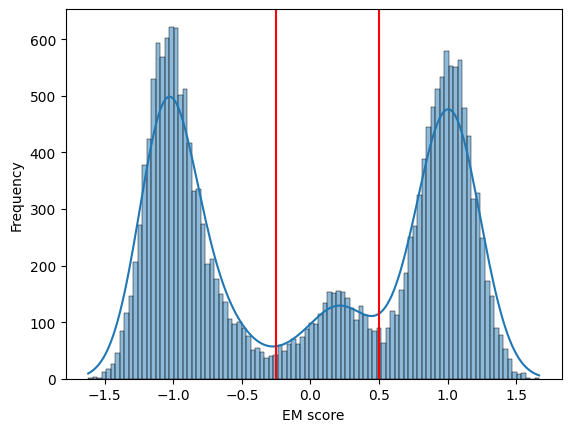

In [ ]:
# Plot the kde of the EM score in a histogram
import seaborn as sns
sns.histplot(df['EM score'], bins=100, kde=True)
plt.xlabel('EM score')
plt.ylabel('Frequency')

# Add vertical lines at approximate local minima
plt.axvline(x=-0.25, color='r', linestyle='-')
plt.axvline(x=0.5, color='r', linestyle='-')

plt.show()


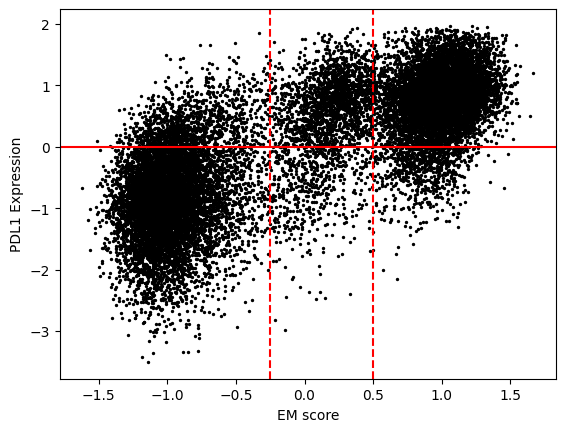

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['EM score'], df['PDL1'], s = 2, color = 'black')
plt.xlabel('EM score')
plt.ylabel('PDL1 Expression')

# Add horizontal line for PDL1 high vs low
plt.axhline(y=0, color='r', linestyle='-')

# Add vertical lines for EM score partitions
plt.axvline(x=-0.25, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')

plt.show()

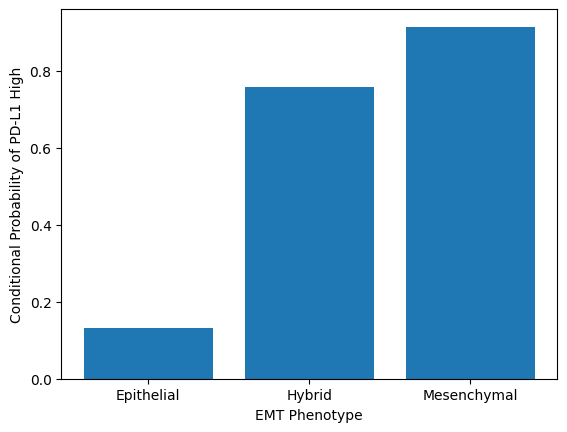

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate conditional probabilities
epithelial_high = df[(df['EM score'] < -0.25) & (df['PDL1'] > 0)].shape[0] / df[df['EM score'] < -0.25].shape[0]
hybrid_high = df[(-0.25 <= df['EM score']) & (df['EM score'] <= 0.5) & (df['PDL1'] > 0)].shape[0] / df[(-0.25 <= df['EM score']) & (df['EM score'] <= 0.5)].shape[0]
mesenchymal_high = df[(df['EM score'] > 0.5) & (df['PDL1'] > 0)].shape[0] / df[df['EM score'] > 0.5].shape[0]

# Create bar plot
phenotypes = ['Epithelial', 'Hybrid', 'Mesenchymal']
probabilities = [epithelial_high, hybrid_high, mesenchymal_high]

plt.bar(phenotypes, probabilities)
plt.xlabel('Phenotype')
plt.ylabel('Conditional Probability of PD-L1 High')
plt.show()

Figure-4

In [ ]:
import pandas as pd

# Read a tab-separated .dat file
df_2 = pd.read_csv('sarthak_2021_fig_2_solution.dat', delimiter='\t', header=None,
names=[' Model_index', 'Number_of_stable_states',
'Runs_converged_to_steady_state', 'SLUG', 'ZEB1', 'miR200', 'CDH1', 'ERa66', 'PDL1', 'ERa36'])

print(df_2[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'ERa66', 'PDL1', 'ERa36']])

# Z-normalize the expression levels of genes using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_2[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'ERa66', 'PDL1', 'ERa36']] = scaler.fit_transform(df_2[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'ERa66', 'PDL1', 'ERa36']])
print(df_2[['SLUG', 'ZEB1', 'miR200', 'CDH1', 'ERa66', 'PDL1', 'ERa36']])


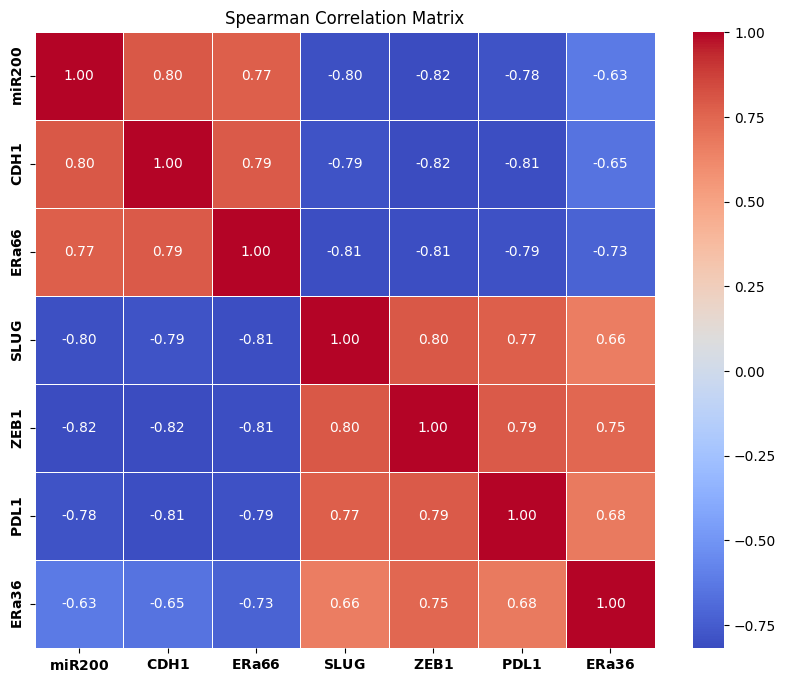

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate pairwise Spearman correlations and get p-values
corr_matrix = df_2[['miR200', 'CDH1', 'ERa66','SLUG', 'ZEB1', 'PDL1', 'ERa36']].corr(method='spearman')

# Plot correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=.5,
            xticklabels=[f"$\\bf{{{label}}}$" for label in corr_matrix.columns],
            yticklabels=[f"$\\bf{{{label}}}$" for label in corr_matrix.index])

plt.title('Spearman Correlation Matrix')
plt.show()

In [ ]:
df_2['EM score'] = (df_2['SLUG'] + df_2['ZEB1'] - df_2['miR200'] - df_2['CDH1'])/4
print(df_2[['EM score']])

       EM score
0     -0.982179
1      0.134021
2      0.878677
3     -0.947799
4      0.212752
...         ...
22460 -1.008041
22461  0.831626
22462 -0.441933
22463 -0.987558
22464  0.939378

[22465 rows x 1 columns]


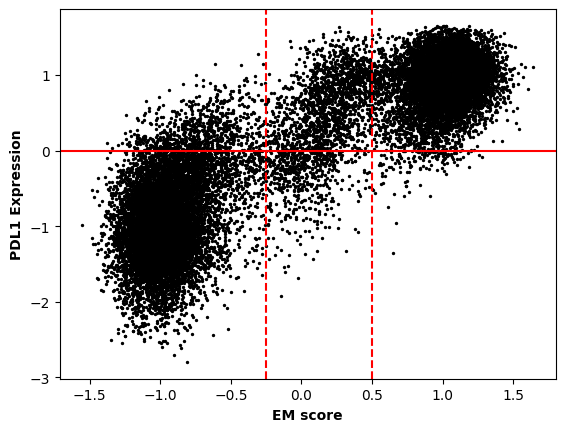

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_2['EM score'], df_2['PDL1'], s = 2, color = 'black')
plt.xlabel('EM score', fontweight = 'bold')
plt.ylabel('PDL1 Expression', fontweight = 'bold')

# Add horizontal line for PDL1 high vs low
plt.axhline(y=0, color='r', linestyle='-')

# Add vertical lines for EM score partitions
plt.axvline(x=-0.25, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')

plt.show()

[0.07406718153903415, 0.7393617021276596, 0.9859067357512953]


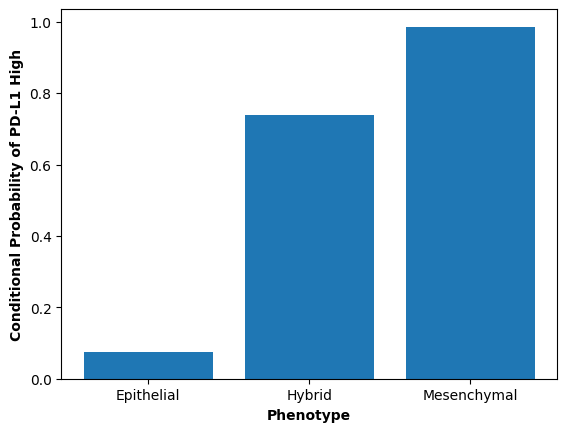

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate conditional probabilities
epithelial_high = df_2[(df_2['EM score'] < -0.25) & (df_2['PDL1'] > 0)].shape[0] / df_2[df_2['EM score'] < -0.25].shape[0]
hybrid_high = df_2[(-0.25 <= df_2['EM score']) & (df_2['EM score'] <= 0.5) & (df_2['PDL1'] > 0)].shape[0] / df_2[(-0.25 <= df_2['EM score']) & (df_2['EM score'] <= 0.5)].shape[0]
mesenchymal_high = df_2[(df_2['EM score'] > 0.5) & (df_2['PDL1'] > 0)].shape[0] / df_2[df_2['EM score'] > 0.5].shape[0]

# Create bar plot
phenotypes = ['Epithelial', 'Hybrid', 'Mesenchymal']
probabilities = [epithelial_high, hybrid_high, mesenchymal_high]
print (probabilities)
plt.bar(phenotypes, probabilities)
plt.xlabel('Phenotype', fontweight = 'bold')
plt.ylabel('Conditional Probability of PD-L1 High', fontweight = 'bold')
plt.show()